In [16]:
!sudo apt-get update -y
!sudo apt-get install -y r-base



Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to rem

In [17]:
pip install rpy2

In [18]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [19]:
%%shell
pip install kaggle

In [20]:
%%R
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_4.0.1.tar.gz'
Content type 'application/x-gzip' length 6343443 bytes (6.0 MB)
downloaded 6.0 MB


The downloaded source packages are in
	‘/tmp/Rtmpsc3pe3/downloaded_packages’


In [21]:
%%R
library(ggplot2)

# **Descripción del Dataset**
Student Mental Health Survey Dataset (2024)

Este dataset recopila información sobre salud mental de estudiantes universitarios, incluyendo indicadores emocionales (ansiedad, depresión, aislamiento), factores académicos (presión, carga de trabajo, satisfacción con los estudios), hábitos personales (sueño, deporte) y aspectos sociales (relaciones y discriminación en el campus).

Su objetivo es analizar qué factores influyen en el bienestar psicológico y académico, permitiendo identificar riesgos y posibles áreas de intervención.



## **Importar Dataset desde Kaggle**

In [22]:
%%shell
mkdir -p /root/.kaggle
mv /content/sample_data/kaggle.json /root/.kaggle/kaggle.json
chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat '/content/sample_data/kaggle.json': No such file or directory


In [23]:
%%shell
kaggle datasets download abdullahashfaqvirk/student-mental-health-survey

Dataset URL: https://www.kaggle.com/datasets/abdullahashfaqvirk/student-mental-health-survey
License(s): CC0-1.0
student-mental-health-survey.zip: Skipping, found more recently modified local copy (use --force to force download)


En esta celda se descargó el dataset desde Kaggle y se descomprimió en la carpeta /content/. Esto garantiza que el archivo CSV quede disponible para ser cargado y analizado dentro de Google Colab. Es el paso inicial para importar la información necesaria para el análisis.

In [24]:
%%shell
unzip -o /content/student-mental-health-survey.zip -d /content/

Archive:  /content/student-mental-health-survey.zip
  inflating: /content/MentalHealthSurvey.csv  


## **Cargar Dataset en R**

In [25]:
%%R
df <- read.csv("/content/MentalHealthSurvey.csv")
head(df, 5)

  gender age university  degree_level     degree_major academic_year    cgpa
1   Male  20         PU Undergraduate     Data Science      2nd year 3.0-3.5
2   Male  20        UET  Postgraduate Computer Science      3rd year 3.0-3.5
3   Male  20       FAST Undergraduate Computer Science      3rd year 2.5-3.0
4   Male  20        UET Undergraduate Computer Science      3rd year 2.5-3.0
5 Female  20        UET Undergraduate Computer Science      3rd year 3.0-3.5
  residential_status campus_discrimination sports_engagement average_sleep
1         Off-Campus                    No         No Sports       4-6 hrs
2         Off-Campus                    No         1-3 times       4-6 hrs
3         Off-Campus                    No         1-3 times       2-4 hrs
4          On-Campus                    No         No Sports       4-6 hrs
5         Off-Campus                   Yes         No Sports       4-6 hrs
  study_satisfaction academic_workload academic_pressure financial_concerns
1           

Aquí se cargó el dataset en un dataframe de R y se visualizaron las primeras 5 filas. Esto permite verificar rápidamente que el archivo se importó correctamente, revisar la estructura visual de los datos y confirmar que las variables están en el formato esperado.

## **Resumen Estadístico Inicial**

In [26]:
%%R
summary(df)

    gender               age         university        degree_level      
 Length:87          Min.   :17.00   Length:87          Length:87         
 Class :character   1st Qu.:19.00   Class :character   Class :character  
 Mode  :character   Median :20.00   Mode  :character   Mode  :character  
                    Mean   :19.94                                        
                    3rd Qu.:21.00                                        
                    Max.   :26.00                                        
 degree_major       academic_year          cgpa           residential_status
 Length:87          Length:87          Length:87          Length:87         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

Esta celda genera un resumen estadístico básico del dataset. Para variables numéricas muestra mínimos, máximos, promedio y cuartiles; para variables categóricas muestra frecuencias. Es el primer paso del EDA porque permite detectar valores anormales o distribuciones poco comunes.

## **Exploración de Columnas y Tipos**

In [27]:
%%R
names(df)   # nombres de columnas
str(df)     # tipos: int, chr, etc.

'data.frame':	87 obs. of  21 variables:
 $ gender                  : chr  "Male" "Male" "Male" "Male" ...
 $ age                     : int  20 20 20 20 20 20 26 22 20 23 ...
 $ university              : chr  "PU" "UET" "FAST" "UET" ...
 $ degree_level            : chr  "Undergraduate" "Postgraduate" "Undergraduate" "Undergraduate" ...
 $ degree_major            : chr  "Data Science" "Computer Science" "Computer Science" "Computer Science" ...
 $ academic_year           : chr  "2nd year" "3rd year" "3rd year" "3rd year" ...
 $ cgpa                    : chr  "3.0-3.5" "3.0-3.5" "2.5-3.0" "2.5-3.0" ...
 $ residential_status      : chr  "Off-Campus" "Off-Campus" "Off-Campus" "On-Campus" ...
 $ campus_discrimination   : chr  "No" "No" "No" "No" ...
 $ sports_engagement       : chr  "No Sports" "1-3 times" "1-3 times" "No Sports" ...
 $ average_sleep           : chr  "4-6 hrs" "4-6 hrs" "2-4 hrs" "4-6 hrs" ...
 $ study_satisfaction      : int  5 5 5 3 3 4 4 3 3 3 ...
 $ academic_workload    

Aquí se revisan los nombres de todas las columnas y sus respectivos tipos. Esto es fundamental para identificar si alguna variable fue importada en el tipo incorrecto (por ejemplo, texto en lugar de número), o si existen nombres mal escritos que puedan causar errores más adelante.

## **Conversión de Variables de Texto a Factor**

In [28]:
%%R
# columnas que son character
char_cols <- sapply(df, is.character)

# convertir solo esas a factor
df[char_cols] <- lapply(df[char_cols], as.factor)

# revisar de nuevo estructura
str(df)

'data.frame':	87 obs. of  21 variables:
 $ gender                  : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 2 2 2 2 ...
 $ age                     : int  20 20 20 20 20 20 26 22 20 23 ...
 $ university              : Factor w/ 9 levels "COMSATS","FAST",..: 5 6 2 6 6 6 5 5 1 1 ...
 $ degree_level            : Factor w/ 2 levels "Postgraduate",..: 2 1 2 2 2 2 1 2 2 2 ...
 $ degree_major            : Factor w/ 4 levels "Computer Science",..: 2 1 1 1 1 1 2 2 1 1 ...
 $ academic_year           : Factor w/ 4 levels "1st year","2nd year",..: 2 3 3 3 3 3 1 2 3 3 ...
 $ cgpa                    : Factor w/ 6 levels "0.0-0.0","1.5-2.0",..: 5 5 4 4 5 5 4 5 4 4 ...
 $ residential_status      : Factor w/ 2 levels "Off-Campus","On-Campus": 1 1 1 2 1 1 2 1 1 1 ...
 $ campus_discrimination   : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 2 2 2 1 ...
 $ sports_engagement       : Factor w/ 4 levels "1-3 times","4-6 times",..: 4 1 1 4 4 4 1 4 1 4 ...
 $ average_sleep           : Factor w/ 3 levels 

En esta celda se identifican las columnas que son de tipo texto y se convierten a factor. Esto es necesario para realizar análisis categóricos adecuados, generar tablas de frecuencia y usar ggplot2 sin errores. Revisar nuevamente la estructura confirma que la conversión fue exitosa.

## **Valores faltantes**

In [29]:
%%R
print(" Valores faltantes por columna:")
print(colSums(is.na(df)))

[1] " Valores faltantes por columna:"
                  gender                      age               university 
                       0                        0                        0 
            degree_level             degree_major            academic_year 
                       0                        0                        0 
                    cgpa       residential_status    campus_discrimination 
                       0                        0                        0 
       sports_engagement            average_sleep       study_satisfaction 
                       0                        0                        0 
       academic_workload        academic_pressure       financial_concerns 
                       0                        0                        0 
    social_relationships               depression                  anxiety 
                       0                        0                        0 
               isolation        future_insecurity 

Se revisa si el dataset contiene valores faltantes en alguna columna. Esta verificación es clave dentro del EDA porque los NA pueden afectar cálculos, modelos y visualizaciones. Saber si existen permite tomar decisiones sobre imputación o limpieza.

## **Filas duplicadas**

In [30]:
%%R
print(" Filas duplicadas en el dataset:")
print(sum(duplicated(df)))

[1] " Filas duplicadas en el dataset:"
[1] 0


Se evalúa si existen filas duplicadas en el dataset. Los duplicados pueden sesgar el análisis o inflar la frecuencia de ciertos valores, por lo que es importante identificar su presencia y eliminarlos si fuera necesario.

## **Valores únicos por columna**

In [31]:
%%R
print(" Valores únicos por columna (para detectar categorías raras):")
lapply(df, unique)

[1] " Valores únicos por columna (para detectar categorías raras):"
$gender
[1] Male   Female
Levels: Female Male

$age
[1] 20 26 22 23 21 19 18 17

$university
[1] PU      UET     FAST    COMSATS NUST    VU      UMT     UOL     KUST   
Levels: COMSATS FAST KUST NUST PU UET UMT UOL VU

$degree_level
[1] Undergraduate Postgraduate 
Levels: Postgraduate Undergraduate

$degree_major
[1] Data Science           Computer Science       Software Engineering  
[4] Information Technology
4 Levels: Computer Science Data Science ... Software Engineering

$academic_year
[1] 2nd year 3rd year 1st year 4th year
Levels: 1st year 2nd year 3rd year 4th year

$cgpa
[1] 3.0-3.5 2.5-3.0 3.5-4.0 1.5-2.0 2.0-2.5 0.0-0.0
Levels: 0.0-0.0 1.5-2.0 2.0-2.5 2.5-3.0 3.0-3.5 3.5-4.0

$residential_status
[1] Off-Campus On-Campus 
Levels: Off-Campus On-Campus

$campus_discrimination
[1] No  Yes
Levels: No Yes

$sports_engagement
[1] No Sports 1-3 times 7+ times  4-6 times
Levels: 1-3 times 4-6 times 7+ times No Sports

Aquí se muestran todos los valores únicos de cada columna para detectar categorías incorrectas o inconsistentes. Esto permite identificar errores como variaciones en la escritura, espacios extra o valores fuera del rango esperado.

## **Estadísticas Descriptivas Numéricas**

In [32]:
%%R
numeric_cols <- sapply(df, is.numeric)

print(" Estadísticas descriptivas (solo columnas numéricas):")
print(summary(df[, numeric_cols]))

[1] " Estadísticas descriptivas (solo columnas numéricas):"
      age        study_satisfaction academic_workload academic_pressure
 Min.   :17.00   Min.   :1.000      Min.   :2.000     Min.   :1.000    
 1st Qu.:19.00   1st Qu.:3.000      1st Qu.:3.000     1st Qu.:3.000    
 Median :20.00   Median :4.000      Median :4.000     Median :4.000    
 Mean   :19.94   Mean   :3.931      Mean   :3.885     Mean   :3.782    
 3rd Qu.:21.00   3rd Qu.:5.000      3rd Qu.:4.500     3rd Qu.:5.000    
 Max.   :26.00   Max.   :5.000      Max.   :5.000     Max.   :5.000    
 financial_concerns social_relationships   depression       anxiety     
 Min.   :1.000      Min.   :1.000        Min.   :1.000   Min.   :1.000  
 1st Qu.:2.500      1st Qu.:2.000        1st Qu.:2.000   1st Qu.:2.000  
 Median :3.000      Median :3.000        Median :3.000   Median :3.000  
 Mean   :3.391      Mean   :2.782        Mean   :3.218   Mean   :3.218  
 3rd Qu.:5.000      3rd Qu.:4.000        3rd Qu.:4.000   3rd Qu.:4.000 

En esta celda se extraen únicamente las estadísticas descriptivas de las variables numéricas. Esto evita mezclar valores categóricos con números y permite revisar si los datos están dentro de rangos lógicos (por ejemplo, edades realistas, escalas de 1 a 5, etc.).

## **Rangos Numéricos**

In [33]:
%%R
print(" Rango mínimo y máximo de cada variable numérica:")
print(apply(df[, numeric_cols], 2, range))

[1] " Rango mínimo y máximo de cada variable numérica:"
     age study_satisfaction academic_workload academic_pressure
[1,]  17                  1                 2                 1
[2,]  26                  5                 5                 5
     financial_concerns social_relationships depression anxiety isolation
[1,]                  1                    1          1       1         1
[2,]                  5                    5          5       5         5
     future_insecurity
[1,]                 1
[2,]                 5


Aquí se calcula el rango mínimo y máximo de cada variable numérica. Esto sirve para identificar posibles anomalías como valores fuera de escala o errores de ingreso que se detectan fácilmente al verificar límites.

## **Histogramas de Variables Clave**

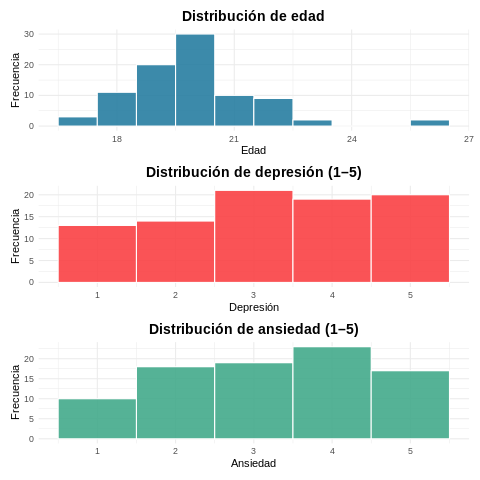

In [48]:
%%R
library(ggplot2)
library(patchwork)

# Histograma de edad (azul)
p_age <- ggplot(df, aes(x = age)) +
  geom_histogram(
    binwidth = 1,
    fill = palette_main[5],   # azul
    color = "white",
    alpha = 0.9
  ) +
  labs(
    title = "Distribución de edad",
    x = "Edad",
    y = "Frecuencia"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

# Histograma de depresión (rojo)
p_dep <- ggplot(df, aes(x = depression)) +
  geom_histogram(
    binwidth = 1,
    fill = palette_main[1],   # rojo
    color = "white",
    alpha = 0.9
  ) +
  labs(
    title = "Distribución de depresión (1–5)",
    x = "Depresión",
    y = "Frecuencia"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

# Histograma de ansiedad (verde)
p_anx <- ggplot(df, aes(x = anxiety)) +
  geom_histogram(
    binwidth = 1,
    fill = palette_main[4],   # verde
    color = "white",
    alpha = 0.9
  ) +
  labs(
    title = "Distribución de ansiedad (1–5)",
    x = "Ansiedad",
    y = "Frecuencia"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

# Mostrar los 3 histogramas juntos
p_age / p_dep / p_anx

Ayuda a visualizar cómo se distribuyen las variables emocionales y si hay sesgos.

## **Tablas de Frecuencia**

In [35]:
%%R
print("Distribución por género:")
print(table(df$gender))

print("Presión académica:")
print(table(df$academic_pressure))

print("Ansiedad:")
print(table(df$anxiety))

print("Depresión:")
print(table(df$depression))

print("Participación en deportes:")
print(table(df$sports_engagement))

print("Horas de sueño (categorías):")
print(table(df$average_sleep))

print("Discriminación en el campus:")
print(table(df$campus_discrimination))

print("Resumen de la edad:")
print(summary(df$age))

[1] "Distribución por género:"

Female   Male 
    24     63 
[1] "Presión académica:"

 1  2  3  4  5 
 5  6 18 32 26 
[1] "Ansiedad:"

 1  2  3  4  5 
10 18 19 23 17 
[1] "Depresión:"

 1  2  3  4  5 
13 14 21 19 20 
[1] "Participación en deportes:"

1-3 times 4-6 times  7+ times No Sports 
       24        11        10        42 
[1] "Horas de sueño (categorías):"

2-4 hrs 4-6 hrs 7-8 hrs 
      5      50      32 
[1] "Discriminación en el campus:"

 No Yes 
 65  22 
[1] "Resumen de la edad:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   19.00   20.00   19.94   21.00   26.00 


Aquí se analiza la distribución de las principales variables categóricas. Esto ayuda a entender cuántos estudiantes se encuentran en cada nivel de ansiedad, depresión, presión académica, horas de sueño, etc., lo cual es vital para interpretar patrones.

## **Selección de Variables Importantes**

In [36]:
%%R
df_f <- df[, c(
  "gender",
  "age",
  "average_sleep",
  "sports_engagement",
  "study_satisfaction",
  "academic_workload",
  "academic_pressure",
  "social_relationships",
  "campus_discrimination",
  "depression",
  "anxiety",
  "isolation",
  "future_insecurity",
  "cgpa"
)]

head(df_f, 5)

  gender age average_sleep sports_engagement study_satisfaction
1   Male  20       4-6 hrs         No Sports                  5
2   Male  20       4-6 hrs         1-3 times                  5
3   Male  20       2-4 hrs         1-3 times                  5
4   Male  20       4-6 hrs         No Sports                  3
5 Female  20       4-6 hrs         No Sports                  3
  academic_workload academic_pressure social_relationships
1                 4                 5                    3
2                 4                 4                    3
3                 5                 5                    4
4                 5                 4                    1
5                 5                 5                    3
  campus_discrimination depression anxiety isolation future_insecurity    cgpa
1                    No          2       1         1                 2 3.0-3.5
2                    No          3       3         3                 4 3.0-3.5
3                    No  

Se seleccionan únicamente las variables importantes para el análisis de salud mental. Esto elimina información irrelevante y produce un dataset más limpio y manejable para la siguiente fase, Se excluyen estas columnas porque no aportan directamente al análisis o introducen ruido:

university

degree_level

degree_major

residential_status

stress_relief_activities

device_type

internet_connection_quality

Las eliminadas no influyen específicamente en ansiedad, depresión o presión académica.

## **Ingeniería de Variables**

In [37]:
%%R -o df_fe

# Crear dataframe base para Feature Engineering
df_fe <- df_f

# --- Crear nuevas variables ---
df_fe$sleep_group <- factor(
  df_fe$average_sleep,
  levels = c("2-4 hrs", "4-6 hrs", "7-8 hrs"),
  labels = c("very_low_sleep", "low_sleep", "normal_sleep")
)

df_fe$sports_binary <- ifelse(
  df_fe$sports_engagement == "No Sports",
  "no_sport",
  "sport"
)

df_fe$high_depression <- ifelse(
  df_fe$depression >= 4,
  "high",
  "low_medium"
)

# --- ELIMINAR VARIABLES ANTIGUAS ---
df_fe$average_sleep <- NULL
df_fe$sports_engagement <- NULL

# Ver resultado final
head(df_fe, 10)



   gender age study_satisfaction academic_workload academic_pressure
1    Male  20                  5                 4                 5
2    Male  20                  5                 4                 4
3    Male  20                  5                 5                 5
4    Male  20                  3                 5                 4
5  Female  20                  3                 5                 5
6  Female  20                  4                 5                 5
7    Male  26                  4                 4                 4
8    Male  22                  3                 4                 4
9    Male  20                  3                 4                 3
10   Male  23                  3                 5                 3
   social_relationships campus_discrimination depression anxiety isolation
1                     3                    No          2       1         1
2                     3                    No          3       3         3
3               

Aquí se crean nuevas variables que facilitan el análisis y permiten hacer comparaciones entre grupos. Agrupar horas de sueño, binarizar deporte y clasificar depresión alta ayudan a visualizar relaciones de manera más clara y detectar patrones significativos. Se seleccionaron únicamente las variables más relevantes para el análisis de salud mental, lo cual permitió reducir ruido y evitar información irrelevante. En este proceso se mantuvieron variables directamente relacionadas con bienestar emocional (depresión, ansiedad, aislamiento, inseguridad sobre el futuro), factores contextuales (presión académica, carga académica, satisfacción con los estudios) y hábitos clave (sueño y deporte). Por otro lado, se eliminaron columnas como university, degree_level, degree_major, cgpa, residential_status y stress_relief_activities, ya que no aportan de manera directa al análisis de salud mental o pueden introducir ruido innecesario.

## **Visualización Final de Datos en Pandas**

In [38]:
import pandas as pd

# df_fe ya viene exportado como dataframe de pandas
pd.DataFrame(df_fe).head(15)

,gender,age,study_satisfaction,academic_workload,academic_pressure,social_relationships,campus_discrimination,depression,anxiety,isolation,future_insecurity,cgpa,sleep_group,sports_binary,high_depression
1,Male,20,5,4,5,3,No,2,1,1,2,3.0-3.5,low_sleep,no_sport,low_medium
2,Male,20,5,4,4,3,No,3,3,3,4,3.0-3.5,low_sleep,sport,low_medium
3,Male,20,5,5,5,4,No,2,3,3,1,2.5-3.0,very_low_sleep,sport,low_medium
4,Male,20,3,5,4,1,No,5,5,5,3,2.5-3.0,low_sleep,no_sport,high
5,Female,20,3,5,5,3,Yes,5,5,4,4,3.0-3.5,low_sleep,no_sport,high
6,Female,20,4,5,5,3,No,5,5,5,5,3.0-3.5,low_sleep,no_sport,high
7,Male,26,4,4,4,2,Yes,5,4,4,5,2.5-3.0,normal_sleep,sport,high
8,Male,22,3,4,4,4,Yes,3,2,2,4,3.0-3.5,low_sleep,no_sport,low_medium
9,Male,20,3,4,3,2,Yes,3,4,3,5,2.5-3.0,low_sleep,sport,low_medium
10,Male,23,3,5,3,1,No,5,5,5,5,2.5-3.0,low_sleep,no_sport,high


El dataframe final con nuevas variables se visualiza en formato de tabla desde Python. Pandas permite mostrar la información de manera más clara y legible, útil para documentación o presentación

# **Visualizaciones**

In [39]:
%%R
# Paleta única y consistente para todo el proyecto
palette_main <- c(
  "#F94144",  # rojo
  "#F8961E",  # naranja
  "#F9C74F",  # amarillo
  "#43AA8B",  # verde
  "#277DA1"   # azul
)


## **Gráfico DONUT - Presión academica**





Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



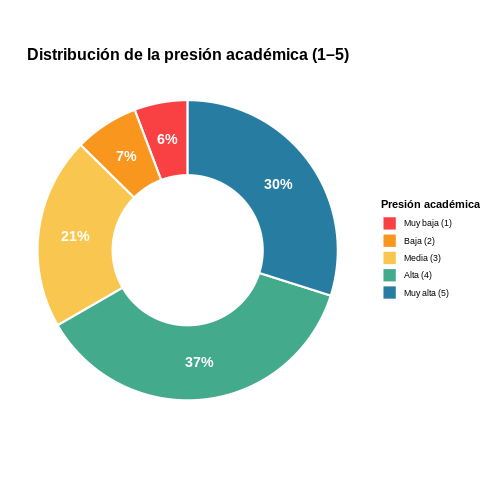

In [40]:
%%R

library(ggplot2)
library(dplyr)

pressure_data <- df_fe %>%
  count(academic_pressure) %>%
  mutate(
    prop = n / sum(n),
    label = paste0(round(prop * 100), "%")
  )

ggplot(pressure_data, aes(x = 2, y = prop, fill = factor(academic_pressure))) +
  geom_col(width = 1, color = "white", linewidth = 1) +
  coord_polar(theta = "y") +
  geom_text(
    aes(label = label),
    position = position_stack(vjust = 0.5),
    color = "white",
    size = 5,
    fontface = "bold"
  ) +
  scale_fill_manual(
    values = palette_main,
    name = "Presión académica",
    labels = c("Muy baja (1)", "Baja (2)", "Media (3)", "Alta (4)", "Muy alta (5)")
  ) +
  xlim(0.5, 2.5) +
  theme_void() +
  ggtitle("Distribución de la presión académica (1–5)") +
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    legend.title = element_text(face = "bold")
  )



Este gráfico muestra cómo la práctica deportiva se relaciona con los niveles de depresión. Se observa si hacer ejercicio actúa como factor protector del estado de ánimo.   "El análisis muestra que los estudiantes que practican deporte presentan un menor porcentaje de depresión alta. Por el contrario, entre quienes no practican actividad física la proporción de depresión alta es casi la mitad del grupo. Esto indica que la práctica de deporte podría actuar como un factor protector frente a la depresión en estudiantes universitarios."

## **Boxplot: Depresión según carga académica**



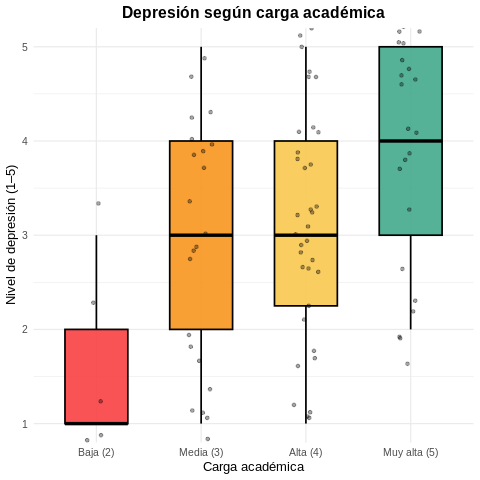

In [41]:
%%R
df_fe$academic_workload <- factor(
  df_fe$academic_workload,
  levels = c(2, 3, 4, 5),
  labels = c("Baja (2)", "Media (3)", "Alta (4)", "Muy alta (5)")
)

ggplot(df_fe, aes(
  x = academic_workload,
  y = depression,
  fill = academic_workload
)) +
  geom_boxplot(
    width = 0.6,
    color = "black",
    size = 0.8,
    alpha = 0.9,
    outlier.shape = 21,
    outlier.fill = "white"
  ) +
  geom_jitter(
    width = 0.12,
    alpha = 0.35,
    size = 1.4
  ) +
  scale_fill_manual(values = palette_main) +
  coord_cartesian(ylim = c(1, 5)) +
  labs(
    title = "Depresión según carga académica",
    x = "Carga académica",
    y = "Nivel de depresión (1–5)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold", hjust = 0.5)
  )

A medida que aumenta la carga académica, los niveles de depresión tienden a incrementarse.
Se observa poca variabilidad en los niveles bajos de carga, y una dispersión mucho mayor en niveles altos, lo que sugiere que la presión académica está asociada con mayor inestabilidad emocional y mayor depresión en algunos estudiantes.

In [42]:
%%R
table(df$academic_workload)


 2  3  4  5 
 5 22 38 22 


## **Mapa de calor : Presióbn académica vs ansiedad**

In addition: Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


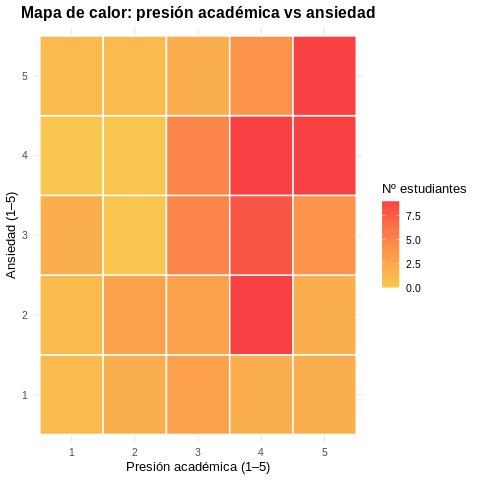

In [43]:
%%R
heat_data <- as.data.frame(table(df$academic_pressure, df$anxiety))
names(heat_data) <- c("academic_pressure", "anxiety", "n")

ggplot(heat_data, aes(
  x = academic_pressure,
  y = anxiety,
  fill = n
)) +
  geom_tile(color = "white", size = 0.7) +
  scale_fill_gradient(
    low = "#F9C74F",
    high = "#F94144"
  ) +
  labs(
    title = "Mapa de calor: presión académica vs ansiedad",
    x = "Presión académica (1–5)",
    y = "Ansiedad (1–5)",
    fill = "Nº estudiantes"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5)
  )


El mapa de calor muestra la combinación de presión académica y ansiedad. Es una visualización poderosa que evidencia patrones y tendencias entre ambas variables.“El mapa de calor evidencia una relación positiva entre presión académica y ansiedad. Los cuadros más oscuros se concentran en las combinaciones de presión 4 y 5 con ansiedad 4 y 5, lo que indica que los estudiantes con exigencias académicas más altas tienden a presentar niveles elevados de ansiedad. En cambio, los niveles bajos de presión académica se asocian principalmente con ansiedad baja.”

## **Gráfico de Barras: Discriminación en el campus**

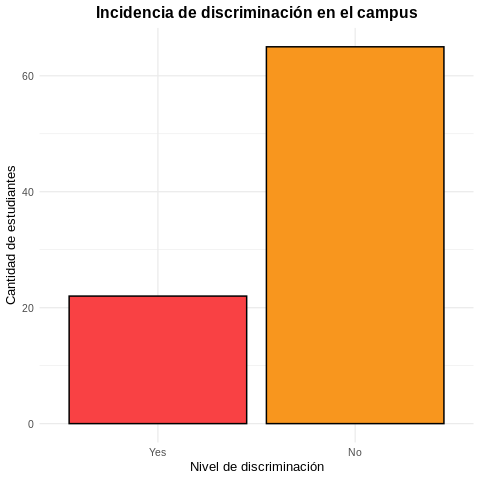

In [44]:
%%R
df_fe$campus_discrimination <- factor(
  df_fe$campus_discrimination,
  levels = names(sort(table(df_fe$campus_discrimination)))
)

ggplot(df_fe, aes(
  x = campus_discrimination,
  fill = campus_discrimination
)) +
  geom_bar(color = "black", linewidth = 0.7) +
  scale_fill_manual(values = palette_main) +
  labs(
    title = "Incidencia de discriminación en el campus",
    x = "Nivel de discriminación",
    y = "Cantidad de estudiantes"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold", hjust = 0.5)
  )



La mayoría de los estudiantes no reporta discriminación, como lo refleja la barra significativamente más alta del grupo "No". Esto indica que, en general, el entorno del campus es percibido como no discriminatorio por una gran parte de la población estudiantil.

Sin embargo, también se observa un grupo considerable de estudiantes que sí afirma haber sufrido discriminación. Aunque el número es menor, representa una proporción importante que no debería ignorarse.

## **Matriz de correlación entre variables académicas y emocionales**

'data.frame':	87 obs. of  5 variables:
 $ academic_pressure: int  5 4 5 4 5 5 4 4 3 3 ...
 $ academic_workload: num  3 3 4 4 4 4 3 3 3 4 ...
 $ depression       : int  2 3 2 5 5 5 5 3 3 5 ...
 $ anxiety          : int  1 3 3 5 5 5 4 2 4 5 ...
 $ isolation        : int  1 3 3 5 4 5 4 2 3 5 ...
                  academic_pressure academic_workload depression anxiety
academic_pressure              1.00              0.43       0.37    0.30
academic_workload              0.43              1.00       0.38    0.38
depression                     0.37              0.38       1.00    0.84
anxiety                        0.30              0.38       0.84    1.00
isolation                      0.25              0.14       0.71    0.67
                  isolation
academic_pressure      0.25
academic_workload      0.14
depression             0.71
anxiety                0.67
isolation              1.00


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.95.tar.gz'
Content type 'application/x-gzip' length 3745190 bytes (3.6 MB)
downloaded 3.6 MB


The downloaded source packages are in
	‘/tmp/Rtmpsc3pe3/downloaded_packages’
corrplot 0.95 loaded


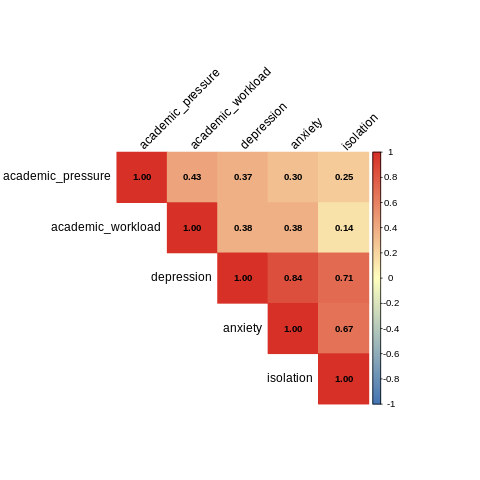

In [45]:
%%R
# Instalar y cargar paquete
install.packages("corrplot")
library(corrplot)

# Seleccionar variables
vars_corr <- df_fe[, c(
  "academic_pressure",
  "academic_workload",
  "depression",
  "anxiety",
  "isolation"
)]

# Convertir factores a numéricos correctamente (por niveles)
vars_corr_num <- data.frame(lapply(vars_corr, function(x) {
  if (is.factor(x)) as.numeric(x) else x
}))

# Verificar estructura
str(vars_corr_num)

# Calcular matriz de correlación
cor_matrix <- cor(vars_corr_num, use = "pairwise.complete.obs")

# Mostrar matriz
print(round(cor_matrix, 2))

# Visualizar matriz de correlación
corrplot(



  cor_matrix,
  method = "color",
  type = "upper",
  addCoef.col = "black",
  tl.col = "black",
  tl.srt = 45,
  number.cex = 0.8,
  col = colorRampPalette(c("#4575b4", "#ffffbf", "#d73027"))(200)
)


La matriz de correlación permite identificar la intensidad y dirección de la relación entre variables académicas y de salud mental.

Se observa una correlación fuerte y positiva entre depresión y ansiedad (0.84), lo que indica que a mayores niveles de depresión suelen presentarse mayores niveles de ansiedad en los estudiantes. De igual forma, la aislación social muestra una correlación alta tanto con depresión (0.71) como con ansiedad (0.67), sugiriendo que el aislamiento está estrechamente relacionado con el deterioro emocional.

En cuanto a los factores académicos, la presión académica presenta una correlación moderada con depresión (0.37) y ansiedad (0.30), mientras que la carga académica se relaciona de manera moderada con ambas variables emocionales (≈0.38). Esto indica que, aunque los factores académicos influyen en la salud mental, su impacto es menor que la relación existente entre las variables emocionales entre sí.

En conjunto, la matriz evidencia que los factores emocionales están más fuertemente interrelacionados, mientras que los factores académicos actúan como elementos desencadenantes o agravantes, pero no como únicos determinantes del malestar psicológico.